Imports

In [1]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [2]:
import sys
sys.path.append("../src") 

In [3]:
from data.wav_data_reader import WavDataReader
from data.signal_dataset import SignalDataset
from features.independent_wav_feature_extractor import IndependentWavFeatureExtractor
from features.features_dataset import FeaturesDataset

Reader

In [4]:
test_folder= r"..\data\interim\testing"

In [5]:
reader= WavDataReader(folder= test_folder, sample_rate= 10000, extract_key= True) #In your case extract_key= False

Signal Dataset

In [6]:
signal_dataset= SignalDataset(signals= reader.get_values(), labels= reader.get_keys(), sample_rate= 10000)
signal_dataset.standardize_signals("zscore") 

In [7]:
time_intervals = [(10, 20),(20, 30),(50, 60),(10, 20),(10, 20),(10, 20),(10, 20),(15, 25)] #7 pairs beacause there are 7 files, 
signal_dataset.reduce_signals_given_intervals(time_intervals)

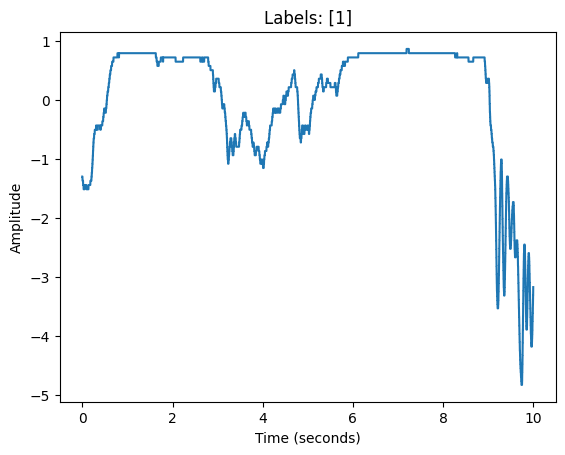

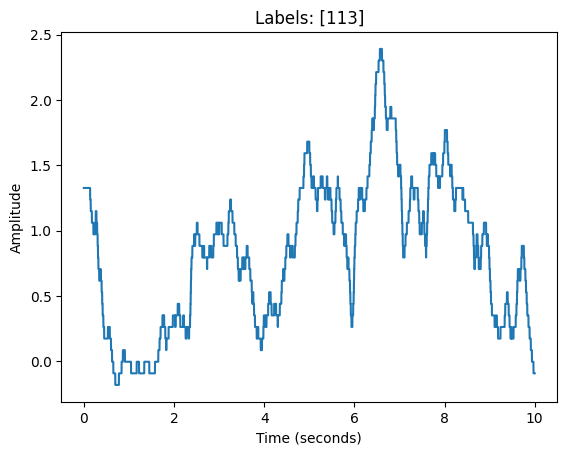

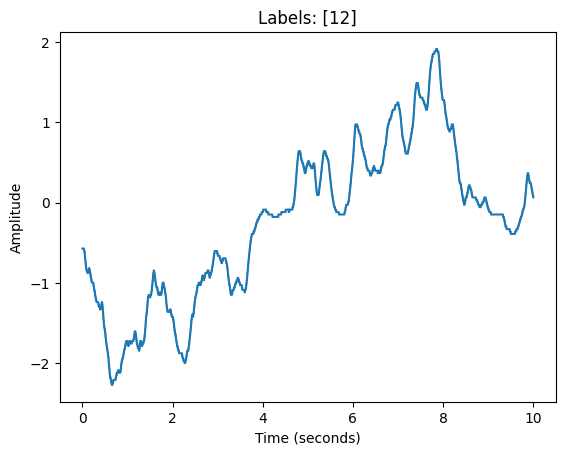

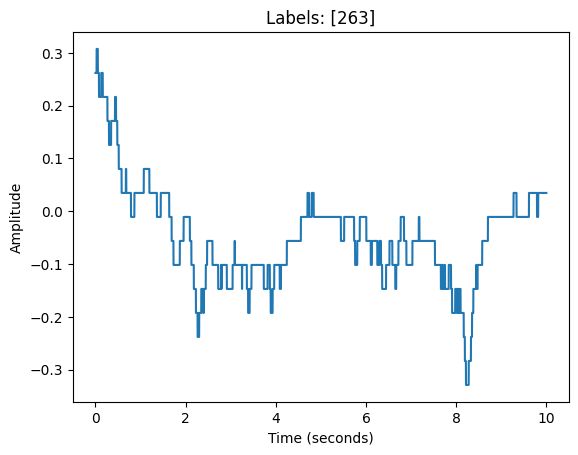

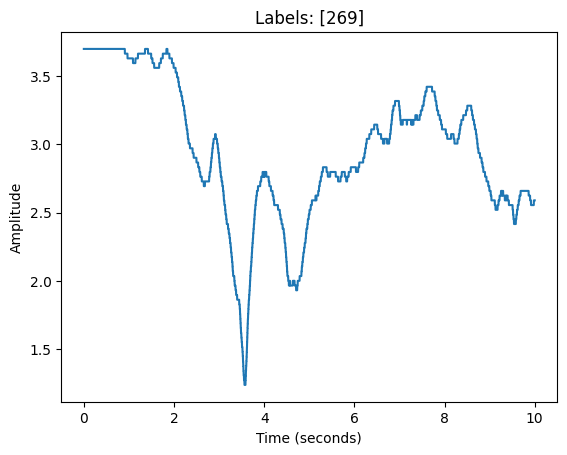

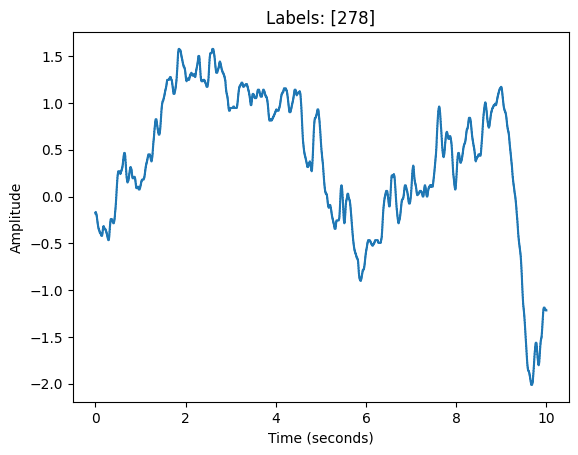

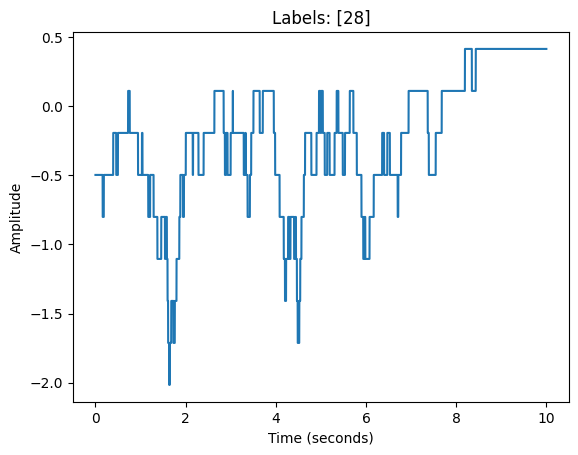

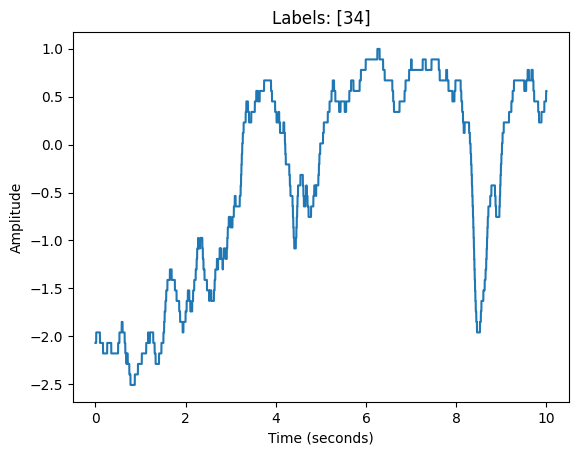

In [8]:
signal_dataset.display_dataset()

In [9]:
signal_dataset.segment_signals(segment_duration=1)
signals, labels= signal_dataset.get_data()

In [10]:
extractor= IndependentWavFeatureExtractor(sample_rate= 10000, n_mfcc= 13, n_fft= 2000, hop_length= 500)
all_features, feature_labels= extractor.extract_features_multiple_waveforms(waveforms= signals, mfccs= True, temporal= True, statistical= True)

Features Dataset

In [11]:
targets= [0,1,1,1,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1]
feat_dataset= FeaturesDataset(features= all_features, targets=targets,feature_labels= feature_labels)
feat_dataset.head()

,mfcc_1_avg,mfcc_2_avg,mfcc_3_avg,mfcc_4_avg,mfcc_5_avg,mfcc_6_avg,mfcc_7_avg,mfcc_8_avg,mfcc_9_avg,mfcc_10_avg,...,hjorth_complexity,hurst,hurst_r2,mean,variance,standard_deviation,interquartile_range,skewness,kurtosis,dfa
0,-218.255402,85.162041,26.685238,24.080906,17.135548,14.251488,11.663844,10.281533,9.010574,8.205205,...,6597.756596,NaN,NaN,-0.156277,0.719391,0.848169,1.370744,-0.323355,-1.321947,1.685886
1,-365.269043,49.818981,20.080887,17.950338,14.175276,12.417116,11.031940,10.348872,9.845506,9.405972,...,9556.923745,NaN,NaN,0.758759,0.002967,0.054468,0.072144,-1.554883,1.978261,1.551529
2,-318.409027,72.963730,25.019871,21.979820,16.341904,13.692100,11.656002,10.570419,9.635355,8.974871,...,8984.100424,NaN,NaN,0.640969,0.019705,0.140375,0.072144,-2.132778,3.803226,1.686449
3,-196.044464,87.485214,26.307312,23.408871,16.203684,13.318266,10.562846,9.211946,7.879086,6.968177,...,12236.608736,NaN,NaN,-0.547646,0.135047,0.367488,0.505011,0.725622,-0.220784,1.691478
4,-200.247482,87.490829,25.731100,23.023212,15.906555,13.178591,10.475439,9.228507,7.941012,7.082955,...,4156.461527,NaN,NaN,-0.236264,0.156764,0.395934,0.577155,-0.203361,-0.685896,1.681987


In [12]:
feat_dataset.shape()

(80, 40)

In [13]:
feat_dataset.preprocess_features(targets= targets)
"""
You can also process it separately like this:
feat_dataset.remove_nan_columns()
feat_dataset.normalize_features(method='zscore')
feat_dataset.treat_outliers(iqr_multiplier=1.5)
feat_dataset.reduce_features(targets, corr_threshold=0.8) #You reduce the features that are correlated by more than the corr_treshold selecting by p_value
"""
processed_features= feat_dataset.get_features_dataframe()
processed_features.head()

Removed columns with NaNs: ['hurst', 'hurst_r2', 'skewness', 'kurtosis']
The Features were properly normalized using 'zscore' method.
Outliers have been treated based on the 1.5 * IQR criterion.
Reduced features from 36 to 4.
Preprocessing complete. Features have been cleaned, normalized, outliers treated, and reduced.


,mfcc_1_avg,zero_crossing_rate,root_mean_square_energy,mean
0,0.654774,0.030252,-0.146175,-0.460855
1,-1.156423,-0.574793,-0.257300,0.274496
2,-0.579111,-0.574793,-0.371501,0.179836
3,0.928411,0.030252,-0.367834,-0.775371
4,0.876630,0.937820,-0.584600,-0.525135


In [14]:
processed_features.shape

(80, 4)

In [17]:
feat_dataset.save_to_csv(filepath='features.csv')
old_feat_dataset= FeaturesDataset.load_from_csv(filepath='features.csv')
old_feat_dataset.head()

,mfcc_1_avg,zero_crossing_rate,root_mean_square_energy,mean
0,0.654774,0.030252,-0.146175,-0.460855
1,-1.156423,-0.574793,-0.257300,0.274496
2,-0.579111,-0.574793,-0.371501,0.179836
3,0.928411,0.030252,-0.367834,-0.775371
4,0.876630,0.937820,-0.584600,-0.525135
